In [2]:
import twint
import pandas as pd
import demoji
from spellchecker import SpellChecker

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer() 
# The SID module takes in a string and returns a score in each of these four categories - positive, negative, neutral, and compound.
import re
nltk.download('words')
words = set(nltk.corpus.words.words())

In [15]:
# Defining a function to scrap 'search_string' mentioned in tweets since a specific date 'since' within the limit 'limit' of tweets.
def twint_search(since, search_string,limit):
    c = twint.Config()
    c.Limit = limit
    c.Search = search_string
    c.Since = since
    c.Store_csv = True  #Stroing the tweets in a csv file
    c.Output = search_string+".csv"
    twint.run.Search(c) #searching in twitter
    df = pd.read_csv(search_string+".csv")
    return df  #returning the results as dataframe

In [ ]:
# calling the scraping function
df=twint_search('2019-09-24','#iPhone13',100)

In [31]:
# checking the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2263 non-null   int64  
 1   conversation_id  2263 non-null   int64  
 2   created_at       2263 non-null   object 
 3   date             2263 non-null   object 
 4   time             2263 non-null   object 
 5   timezone         2263 non-null   int64  
 6   user_id          2263 non-null   int64  
 7   username         2263 non-null   object 
 8   name             2263 non-null   object 
 9   place            17 non-null     object 
 10  tweet            2263 non-null   object 
 11  language         2263 non-null   object 
 12  mentions         2263 non-null   object 
 13  urls             2263 non-null   object 
 14  photos           2263 non-null   object 
 15  replies_count    2263 non-null   int64  
 16  retweets_count   2263 non-null   int64  
 17  likes_count   

In [66]:
# printing a tweet as an example
df['tweet'][50]

'Nature always inspires me …  #nature #colour #oakleaves #elanvalley #rivers #colour #streams #texture #iphone13 #landscape #midwales @ Elan Valley  https://t.co/819bnwtv2g'

In [37]:
# checking the sentiments in this tweet according to sid library
sentence = df['tweet'][50]
sid.polarity_scores(sentence)['compound']

0.4404

In [62]:
# Defining a function to clean the collected dataset
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split()) 
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) # splitting the tweet into tokens
         if w.lower() in words and w.isalpha())
    return tweet
# Cleaning the collected data
df['tweet_clean'] = df['tweet'].apply(cleaner)

In [ ]:
# finding sentements for the collected tweets
list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])
df['sentiment'] = pd.Series(list1)
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)
df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [63]:
# printing some colomns of our collected data
df = df[['tweet','date','id','sentiment','sentiment_category','tweet_clean']]
df.head()

,tweet,date,id,sentiment,sentiment_category,tweet_clean
0,Trendy Girl in Spring in Paris by DaDo ART for...,2022-03-13,1503072153910063106,0.0000,neutral,Girl in Spring in by DaDo ART for Galaxy S21 |...
1,#iPhone12 、Apple公式よりも #楽天モバイル が安いって知ってた？ ソフトバン...,2022-03-13,1503069180316327942,0.0000,neutral,iPhone12 、 ？ 、 、 auよりもなんと1 . 5万円以上安く買える ！ 🙆‍♀️...
2,"#BONPLAN #PROMO Apple Watch Series 7, AirPods...",2022-03-13,1503068374363951113,0.0000,neutral,"Apple Watch Series 7 , Pro , pour , Apple Watc..."
3,Anker Foldable 3-in-1 Station with Power Adapt...,2022-03-13,1503066862204198913,0.0000,neutral,Anker Foldable 3 - in - 1 Station with Power A...
4,#wallpapers #homescreen #lockscreen 🚦#wallpa...,2022-03-13,1503064755807870994,0.6688,positive,🚦 wallpaper 🚦 iPhone13ProMax 🚦 iPhone13 🚦 andr...


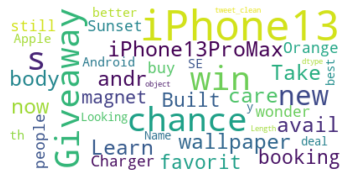

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# plotting a word cloud of positive mentions of iPhone13 in the tweets
positive = df[df['sentiment_category']=='positive']
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(positive['tweet_clean']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Step 2

In [5]:
collected_data = pd.read_csv('#iPhone13.csv')

In [8]:
tweets=collected_data["tweet"]

In [9]:
len(tweets)

3600

In [10]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet,stopwords, words
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm
import sys
import spacy
from html.parser import HTMLParser
import seaborn as sns
from matplotlib.pyplot import figure
import html

In [11]:
nlp = spacy.load('en_core_web_sm')  # English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.

In [15]:
stop_words = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())

In [22]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")
raw_text="Hi India"
text1= NER(raw_text)
processed=nlp(raw_text)
print(raw_text)
for word in text1.ents:
    print(word.text,word.label_)

Hi India
India GPE


In [23]:
processed=nlp(raw_text)
processed

Hi India

In [33]:

print(processed.text)
for token in processed:
    print(token.text, token.pos_, token.dep_, token.ent_type_=="")

Hi India
Hi INTJ ROOT True
India PROPN npadvmod False


In [44]:
def nlp_process(data):
    doc = nlp(data)
    lemmas = []
    for token in doc:
        if token.lang_ == 'en' and token.pos_ != 'SPACE' and token.text not in stop_words:
            if token.ent_type_!="":  # if the token is recognized as a Name Entity
                lemmas.append(token.text)
            elif token.text.lower() in words: #Checking if the word is in the dictionary (meaningful english world)
                lemmas.append(token.lemma_)
    return ' '.join(lemmas)

In [45]:
from tqdm.notebook import tqdm

In [48]:
cleaned_tweets= ([nlp_process(tweet) for tweet in tweets])

In [41]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split()) 
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) # splitting the tweet into tokens
         if w.lower() in words and w.isalpha())
    return tweet
# Cleaning the collected data
tweets=[ cleaner(tweet) for tweet in tweets]

In [49]:
cleaned_tweets

['girl Spring DaDo ART Galaxy art apple',
 '',
 'Apple Watch Series Pro pour Apple Watch Power Delivery',
 'Anker Foldable Station Power Adapter Wireless Charger work Pro Pro Apple Watch Series More watch charge Cable not include via',
 'wallpaper android Subscribe super wallpaper bag you find folder Sort modification time',
 'Don know feel green overly deep saturate apple',
 'QUALE MAC Air Mac Mac Studio via Apple Apple',
 'Green green Apple',
 '',
 '',
 'color Coffee Man Galaxy art apple',
 'learn new get new available Green order FREE trade eligible device get today one one appointment apple',
 'pro',
 'video tape Print Phone Case for apple',
 'take care body book favorite massage therapy session us arsenal earthquake',
 'I Giveaway chance win BRAND NEW case',
 'I go week I live',
 'build magnet Charger Sunset Orange Warm winter sparkle summer exclusive color only US check find phone',
 'order Alpine Green Pro wait see',
 '',
 'I bring new phone blue fall love blue blue',
 '',
 'I G

In [50]:
tweet = """\
... #startspreadingthenews yankees win great start by 🎅🏾 going 5strong innings with 5k’s🔥 🐂
... solo homerun 🌋🌋 with 2 solo homeruns and👹 3run homerun… 🤡 🚣🏼 👨🏽‍⚖️ with rbi’s … 🔥🔥
... 🇲🇽 and 🇳🇮 to close the game🔥🔥!!!….
... WHAT A GAME!!..
... """

In [58]:
demoji.replace_with_desc(tweet," ") 

'#startspreadingthenews yankees win great start by  Santa Claus: medium-dark skin tone  going 5strong innings with 5k’s fire   ox \nsolo homerun  volcano  volcano  with 2 solo homeruns and ogre  3run homerun…  clown face   person rowing boat: medium-light skin tone   man judge: medium skin tone  with rbi’s …  fire  fire \n flag: Mexico  and  flag: Nicaragua  to close the game fire  fire !!!….\nWHAT A GAME!!..\n'

In [52]:

demoji.findall(tweet)

{'🚣🏼': 'person rowing boat: medium-light skin tone',
 '🇳🇮': 'flag: Nicaragua',
 '🐂': 'ox',
 '👹': 'ogre',
 '🌋': 'volcano',
 '🤡': 'clown face',
 '🎅🏾': 'Santa Claus: medium-dark skin tone',
 '🇲🇽': 'flag: Mexico',
 '👨🏽\u200d⚖️': 'man judge: medium skin tone',
 '🔥': 'fire'}

In [ ]:
def cleaning(text):
    # Replacing emojis with their describtion
    no_emoji=demoji.replace_with_desc(text," ") 
    no_at = re.sub("@[A-Za-z0-9]+","",no_emoji) #Remove @ sign
    no_link = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", no_at) #Remove http links
    no_hashtag = no_link.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    no_asci=re.sub(r'[^\x00-\x7f]',r' ',no_hashtag) #non asci
    no_punc=no_asci.translate(table)

    #tweet = " ".join(w for w in nltk.wordpunct_tokenize(no_punc) # splitting the tweet into tokens
    #     if w.lower() in words and w.isalpha())
    return no_punc

In [93]:
def spell_checking(text):
    # Fixing Word Lengthening, which occurs when characters are wrongly repeated. 
    # English words have a max of two repeated characters. Additional characters need to ripped off, 
    pattern = re.compile(r"(.)\1{2,}")
    length_fixed= pattern.sub(r"\1\1", text)
    tweet = " ".join(w if (w[0].isupper()) else spell.correction(w) for w in nltk.wordpunct_tokenize(length_fixed) )
    return(tweet)

In [94]:
spell_checking("Nemat")

'Nemat'

In [95]:
def nlp_analyzing(text):    
    doc = nlp(text)
    lemmas = []
    for token in doc:
        if token.lang_ == 'en' and token.pos_ != 'SPACE' and token.text not in stop_words:
            if token.ent_type_!="":  # if the token is recognized as a Name Entity
                lemmas.append(token.text)
            elif token.text.lower() in words: #Checking if the word is in the dictionary (meaningful english world)
                lemmas.append(token.lemma_)
    return ' '.join(lemmas)
print(nlp_analyzing(spell_checking("amazzzzing you arrrre")))


amazing


In [ ]:


# find those words that may be misspelled
misspelled = spell.unknown(['let', 'us', 'wlak','on','the','groun'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

In [66]:
spell.correction("word")

'word'

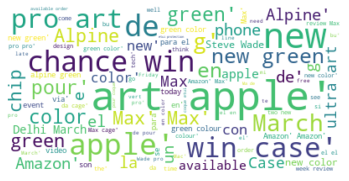

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# plotting a word cloud of positive mentions of iPhone13 in the tweets
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(cleaned_tweets))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()